## Black Friday Sales Prediction

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [79]:
data=pd.read_csv('train.csv')

In [80]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [82]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Data Cleaning

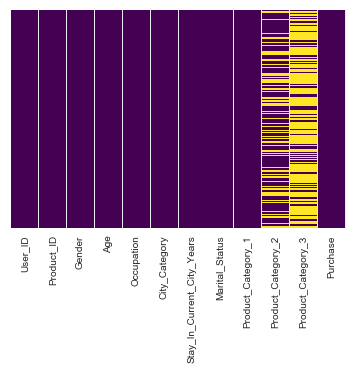

In [83]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [84]:
data[data['Product_Category_2'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,NaN,9743
23,1000008,P00214442,M,26-35,12,C,4+,1,8,NaN,NaN,5982
26,1000009,P00039942,M,26-35,17,C,0,0,8,NaN,NaN,5887


In [85]:
data['Product_Category_2'].isnull().count()

550068

In [86]:
data[data['Product_Category_3'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,NaN,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [87]:
data['Product_Category_3'].isnull().count()

550068

In [88]:
data.groupby('User_ID').count().head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,35,35,35,35,35,35,35,35,21,14,35
1000002,77,77,77,77,77,77,77,77,54,26,77
1000003,29,29,29,29,29,29,29,29,23,13,29
1000004,14,14,14,14,14,14,14,14,12,9,14
1000005,106,106,106,106,106,106,106,106,58,16,106


In [89]:
def fill_product3(cols):
    Product_Category_3=cols
    if pd.isnull(Product_Category_3):
        return 0
    else:
        return cols
    
    

In [90]:
def fill_product2(cols):
    Product_Category_2=cols
    if pd.isnull(Product_Category_2):
        return 0
    else:
        return cols
    

In [91]:
data['Product_Category_2']=data['Product_Category_2'].apply(fill_product2)


In [92]:
data['Product_Category_3']=data['Product_Category_3'].apply(fill_product3)

In [93]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

##### There is no null values present

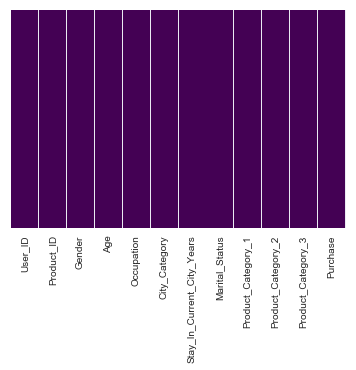

In [94]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [95]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [96]:
def func(x):
    for i in x:
        return x[1:]

In [97]:
data['Product_ID']=data['Product_ID'].apply(func)

In [98]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [99]:
data['Male']=data['Gender'].map({'F':0,'M':1})
data.drop('Gender',axis=1,inplace=True)
data.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male
0,1000001,00069042,0-17,10,A,2,0,3,0.0,0.0,8370,0
1,1000001,00248942,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,1000001,00087842,0-17,10,A,2,0,12,0.0,0.0,1422,0
3,1000001,00085442,0-17,10,A,2,0,12,14.0,0.0,1057,0
4,1000002,00285442,55+,16,C,4+,0,8,0.0,0.0,7969,1


In [100]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [101]:
data['City_Category']=data['City_Category'].map({'A':0,'B':1,'C':2})

data.head()


,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male
0,1000001,00069042,0-17,10,0,2,0,3,0.0,0.0,8370,0
1,1000001,00248942,0-17,10,0,2,0,1,6.0,14.0,15200,0
2,1000001,00087842,0-17,10,0,2,0,12,0.0,0.0,1422,0
3,1000001,00085442,0-17,10,0,2,0,12,14.0,0.0,1057,0
4,1000002,00285442,55+,16,2,4+,0,8,0.0,0.0,7969,1


In [103]:
data['City_Category'].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [104]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [105]:
data[data['Stay_In_Current_City_Years']=='4+' ]

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male
4,1000002,00285442,55+,16,2,4+,0,8,0.0,0.0,7969,1
19,1000008,00249542,26-35,12,2,4+,1,1,5.0,15.0,19614,1
20,1000008,00220442,26-35,12,2,4+,1,5,14.0,0.0,8584,1
21,1000008,00156442,26-35,12,2,4+,1,8,0.0,0.0,9872,1
22,1000008,00213742,26-35,12,2,4+,1,8,0.0,0.0,9743,1
23,1000008,00214442,26-35,12,2,4+,1,8,0.0,0.0,5982,1
24,1000008,00303442,26-35,12,2,4+,1,1,8.0,14.0,11927,1
29,1000010,00085942,36-45,1,1,4+,1,2,4.0,8.0,16352,0
30,1000010,00118742,36-45,1,1,4+,1,5,11.0,0.0,8886,0
31,1000010,00297942,36-45,1,1,4+,1,8,0.0,0.0,5875,0


In [106]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':5})

In [107]:
data.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male
0,1000001,00069042,0-17,10,0,2,0,3,0.0,0.0,8370,0
1,1000001,00248942,0-17,10,0,2,0,1,6.0,14.0,15200,0
2,1000001,00087842,0-17,10,0,2,0,12,0.0,0.0,1422,0
3,1000001,00085442,0-17,10,0,2,0,12,14.0,0.0,1057,0
4,1000002,00285442,55+,16,2,5,0,8,0.0,0.0,7969,1


In [108]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [109]:
def func(xyz):
    xy=xyz
    if xy=="0-17":
        return 8.5
    elif xy=="55+":
        return 56
    elif xy=="51-55":
        return (51+55)/2
    elif xy=="46-50":
        return (46+50)/2
    elif xy=="18-25":
        return (18+25)/2
    elif xy=="36-45":
        return (36+45)/2
    elif xy=="26-35":
        return (26+35)/2
    else:
        return xy

In [110]:
data['Age']=data['Age'].apply(func)

In [111]:
data.head(12)

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male
0,1000001,00069042,8.5,10,0,2,0,3,0.0,0.0,8370,0
1,1000001,00248942,8.5,10,0,2,0,1,6.0,14.0,15200,0
2,1000001,00087842,8.5,10,0,2,0,12,0.0,0.0,1422,0
3,1000001,00085442,8.5,10,0,2,0,12,14.0,0.0,1057,0
4,1000002,00285442,56.0,16,2,5,0,8,0.0,0.0,7969,1
5,1000003,00193542,30.5,15,0,3,0,1,2.0,0.0,15227,1
6,1000004,00184942,48.0,7,1,2,1,1,8.0,17.0,19215,1
7,1000004,00346142,48.0,7,1,2,1,1,15.0,0.0,15854,1
8,1000004,0097242,48.0,7,1,2,1,1,16.0,0.0,15686,1
9,1000005,00274942,30.5,20,0,1,1,8,0.0,0.0,7871,1


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
data.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Male'],
      dtype='object')

In [150]:
X=data.drop('Purchase',axis=1)
y=data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
linmodel=LinearRegression()

In [153]:
linmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
Male                          False
dtype: bool

In [156]:
test_data=pd.read_csv('test.csv')

In [157]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [158]:
test_data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
dtype: bool

In [159]:
def fill_product3(cols):
    Product_Category_3=cols
    if pd.isnull(Product_Category_3):
        return 0
    else:
        return cols
    
    

In [160]:
def fill_product2(cols):
    Product_Category_2=cols
    if pd.isnull(Product_Category_2):
        return 0
    else:
        return cols
    

In [161]:
test_data['Product_Category_2']=test_data['Product_Category_2'].apply(fill_product2)
test_data['Product_Category_3']=test_data['Product_Category_3'].apply(fill_product3)

In [162]:
test_data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
dtype: bool

In [163]:
def func(x):
    for i in x:
        return x[1:]

In [164]:
test_data['Product_ID']=test_data['Product_ID'].apply(func)

In [165]:
test_data['Male']=test_data['Gender'].map({'F':0,'M':1})
test_data.drop('Gender',axis=1,inplace=True)
test_data.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Male
0,1000004,00128942,46-50,7,B,2,1,1,11.0,0.0,1
1,1000009,00113442,26-35,17,C,0,0,3,5.0,0.0,1
2,1000010,00288442,36-45,1,B,4+,1,5,14.0,0.0,0
3,1000010,00145342,36-45,1,B,4+,1,4,9.0,0.0,0
4,1000011,00053842,26-35,1,C,1,0,4,5.0,12.0,0


In [166]:
test_data['City_Category']=test_data['City_Category'].map({'A':0,'B':1,'C':2})
test_data.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Male
0,1000004,00128942,46-50,7,1,2,1,1,11.0,0.0,1
1,1000009,00113442,26-35,17,2,0,0,3,5.0,0.0,1
2,1000010,00288442,36-45,1,1,4+,1,5,14.0,0.0,0
3,1000010,00145342,36-45,1,1,4+,1,4,9.0,0.0,0
4,1000011,00053842,26-35,1,2,1,0,4,5.0,12.0,0


In [167]:
test_data['Stay_In_Current_City_Years'].value_counts()

1     82604
2     43589
3     40143
4+    35945
0     31318
Name: Stay_In_Current_City_Years, dtype: int64

In [168]:
test_data[test_data['Stay_In_Current_City_Years']=='4+' ]

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Male
2,1000010,00288442,36-45,1,1,4+,1,5,14.0,0.0,0
3,1000010,00145342,36-45,1,1,4+,1,4,9.0,0.0,0
9,1000022,00067942,18-25,15,0,4+,0,5,14.0,0.0,1
19,1000035,0096642,46-50,1,2,4+,1,2,3.0,4.0,1
33,1000059,00177442,51-55,1,1,4+,1,1,6.0,8.0,0
40,1000073,00112642,18-25,4,0,4+,0,1,2.0,5.0,1
53,1000100,00110842,36-45,17,2,4+,0,1,2.0,5.0,1
54,1000100,00193542,36-45,17,2,4+,0,1,2.0,0.0,1
55,1000100,00243942,36-45,17,2,4+,0,1,2.0,15.0,1
57,1000107,00089042,46-50,18,2,4+,0,13,0.0,0.0,1


In [169]:
test_data['Stay_In_Current_City_Years']=test_data['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':5})

In [170]:
test_data['Age'].value_counts()

26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64

In [171]:
def func(xyz):
    xy=xyz
    if xy=="0-17":
        return 8.5
    elif xy=="55+":
        return 56
    elif xy=="51-55":
        return (51+55)/2
    elif xy=="46-50":
        return (46+50)/2
    elif xy=="18-25":
        return (18+25)/2
    elif xy=="36-45":
        return (36+45)/2
    elif xy=="26-35":
        return (26+35)/2
    else:
        return xy

In [172]:
test_data['Age']=test_data['Age'].apply(func)

In [173]:
test_data.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Male
0,1000004,00128942,48.0,7,1,2,1,1,11.0,0.0,1
1,1000009,00113442,30.5,17,2,0,0,3,5.0,0.0,1
2,1000010,00288442,40.5,1,1,5,1,5,14.0,0.0,0
3,1000010,00145342,40.5,1,1,5,1,4,9.0,0.0,0
4,1000011,00053842,30.5,1,2,1,0,4,5.0,12.0,0


In [174]:
X_test.shape

(0, 11)

In [175]:
test_data.shape

(233599, 11)

In [176]:
predictions=linmodel.predict(test_data)

In [177]:
predictions

array([10652.81168027, 10125.68306933,  8244.74518212, ...,
       11908.56163475,  7525.65683696,  8593.66244954])

In [179]:
test_predict=pd.DataFrame(predictions,columns=['Predictions'])
test_predict.head()

,Predictions
0,10652.811680
1,10125.683069
2,8244.745182
3,8936.582360
4,11016.143187


In [181]:
new=pd.read_csv('test.csv')

new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [182]:
new.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [183]:
new.drop(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],axis=1,inplace=True)
new.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [184]:
test_predict.head()

,Predictions
0,10652.811680
1,10125.683069
2,8244.745182
3,8936.582360
4,11016.143187


In [186]:
new['Purchase']=test_predict['Predictions'].copy()
new.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10652.811680
1,1000009,P00113442,10125.683069
2,1000010,P00288442,8244.745182
3,1000010,P00145342,8936.582360
4,1000011,P00053842,11016.143187


In [189]:
print(test_data.shape)
print(test_predict.shape)
print(new.shape)

(233599, 11)
(233599, 1)
(233599, 3)


In [188]:
new.to_csv('Submission.csv',index=False)

# Thank You